In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

titanic = pd.read_csv('train.csv') 

Missing Value Analysis:


,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


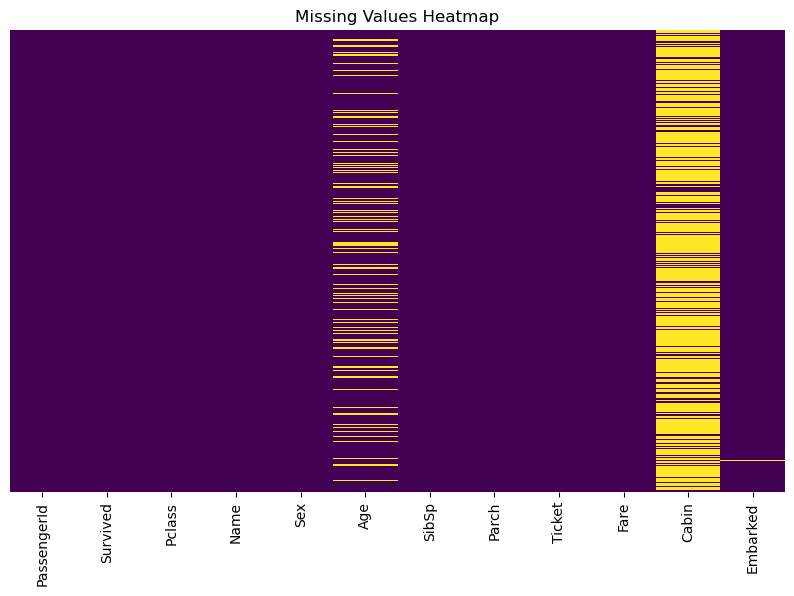

In [6]:
missing_values = titanic.isnull().sum()
missing_percent = (missing_values / len(titanic)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print("Missing Value Analysis:")
display(missing_data)

plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

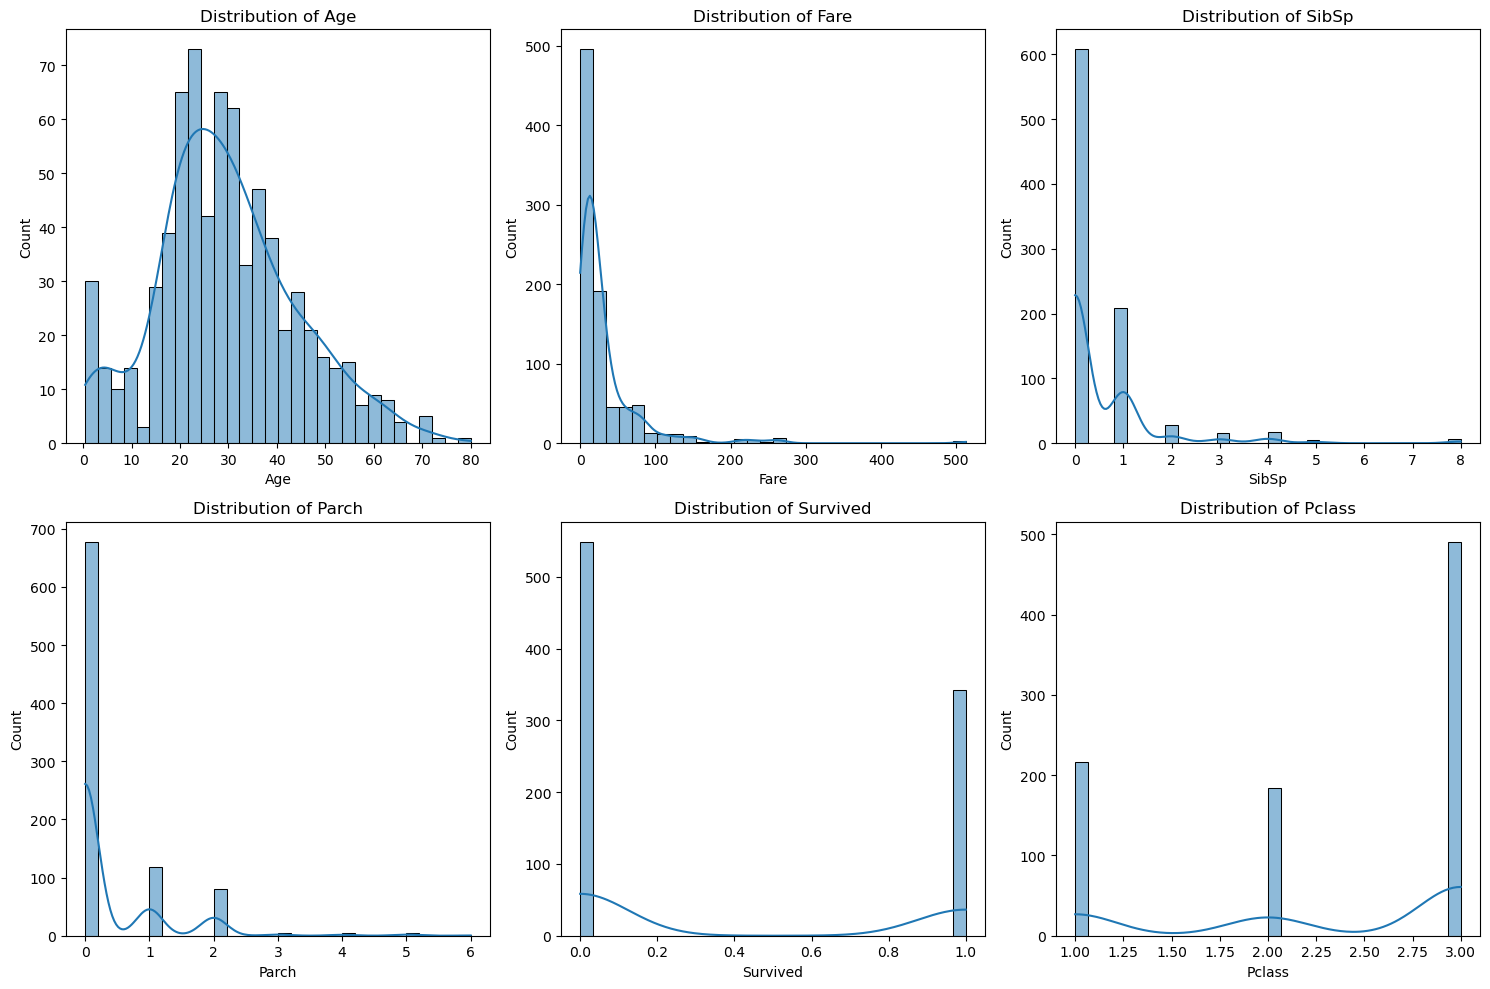

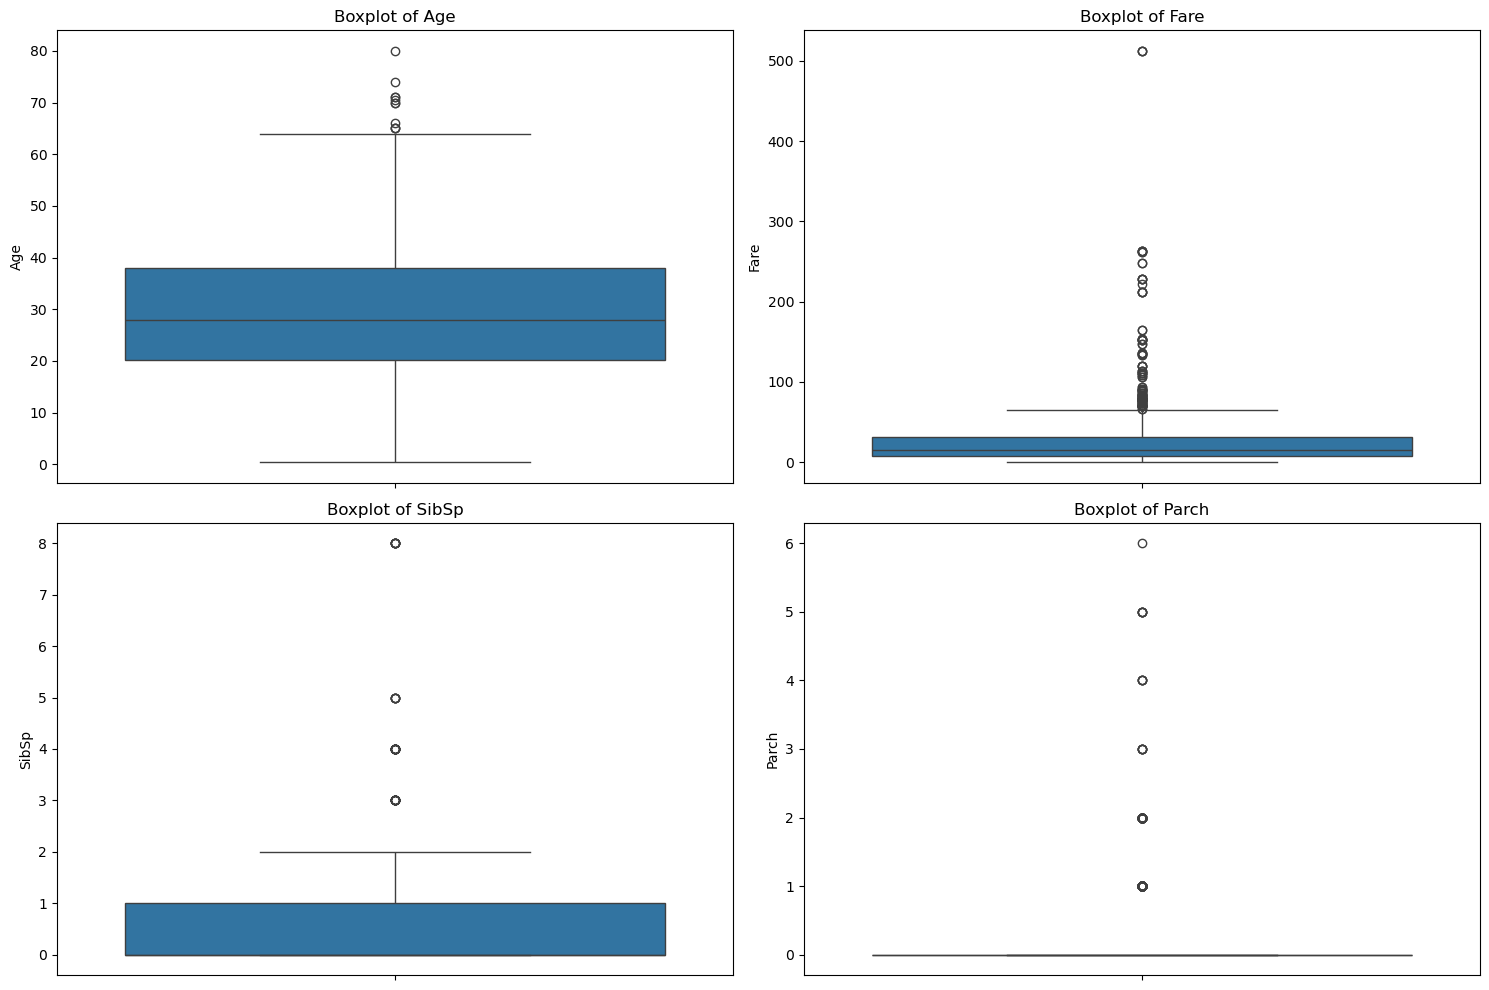

In [8]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived', 'Pclass']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(titanic[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=titanic[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

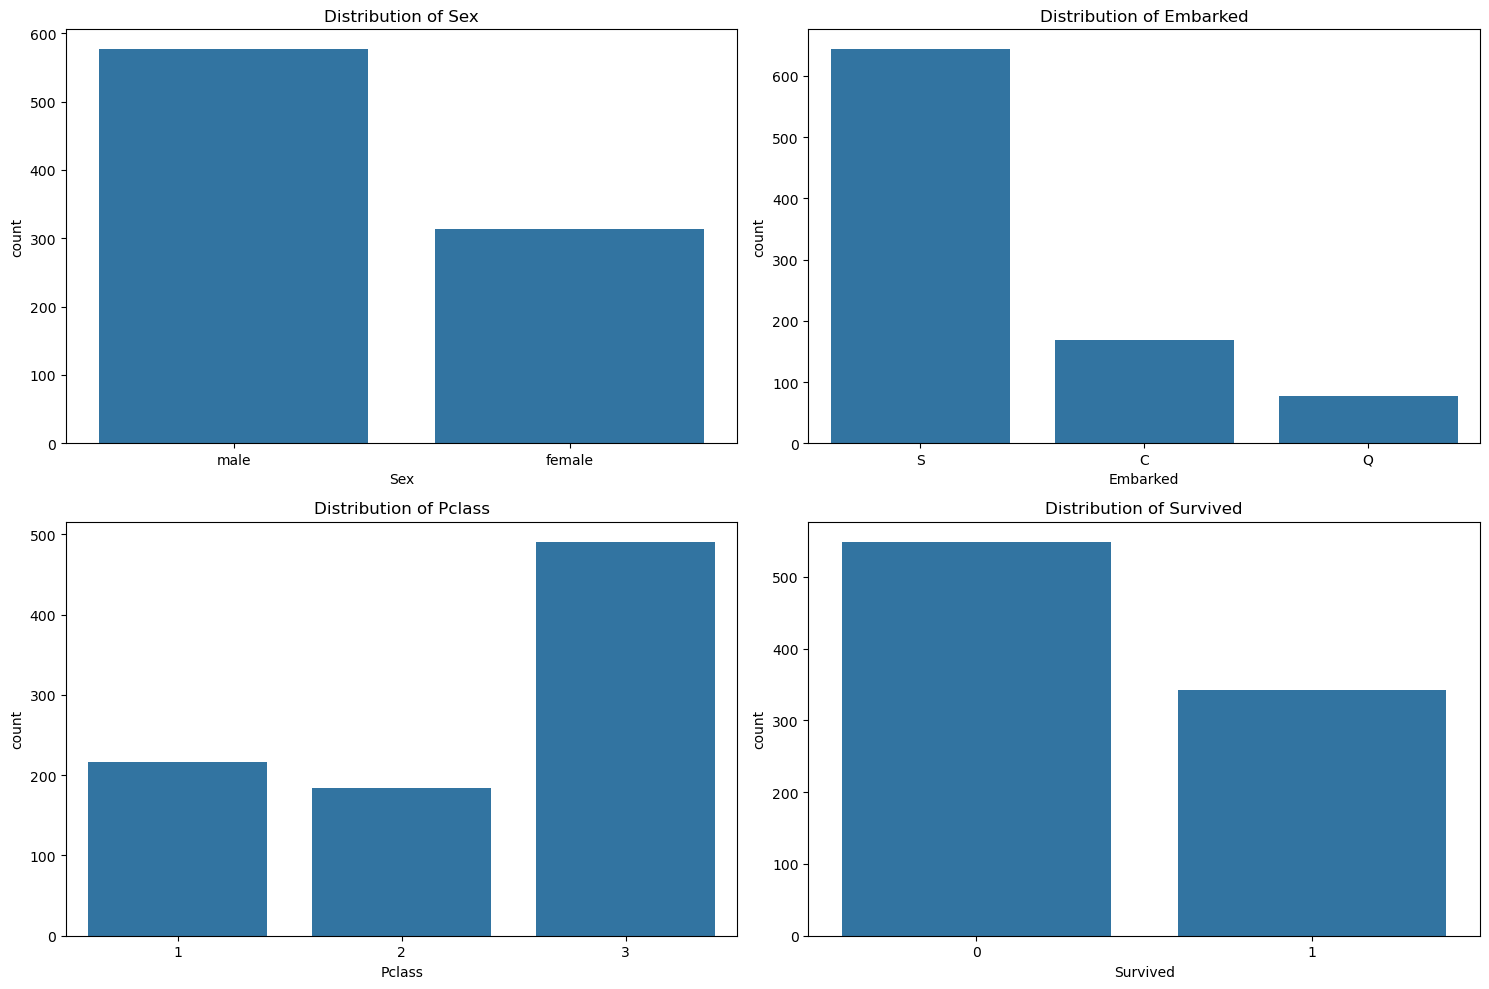

In [10]:
cat_cols = ['Sex', 'Embarked', 'Pclass', 'Survived']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=titanic, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [12]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

fare_outliers = detect_outliers(titanic, 'Fare')
print(f"Number of Fare outliers: {len(fare_outliers)}")
print("Top 5 highest fares:")
display(fare_outliers[['Name', 'Pclass', 'Fare', 'Cabin']].sort_values('Fare', ascending=False).head())

age_outliers = detect_outliers(titanic, 'Age')
print(f"\nNumber of Age outliers: {len(age_outliers)}")
print("Top 5 oldest passengers:")
display(age_outliers[['Name', 'Age', 'Pclass', 'Survived']].sort_values('Age', ascending=False).head())

Number of Fare outliers: 116
Top 5 highest fares:


,Name,Pclass,Fare,Cabin
679,"Cardeza, Mr. Thomas Drake Martinez",1,512.3292,B51 B53 B55
258,"Ward, Miss. Anna",1,512.3292,NaN
737,"Lesurer, Mr. Gustave J",1,512.3292,B101
341,"Fortune, Miss. Alice Elizabeth",1,263.0000,C23 C25 C27
438,"Fortune, Mr. Mark",1,263.0000,C23 C25 C27



Number of Age outliers: 11
Top 5 oldest passengers:


,Name,Age,Pclass,Survived
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,1,1
851,"Svensson, Mr. Johan",74.0,3,0
96,"Goldschmidt, Mr. George B",71.0,1,0
493,"Artagaveytia, Mr. Ramon",71.0,1,0
116,"Connors, Mr. Patrick",70.5,3,0


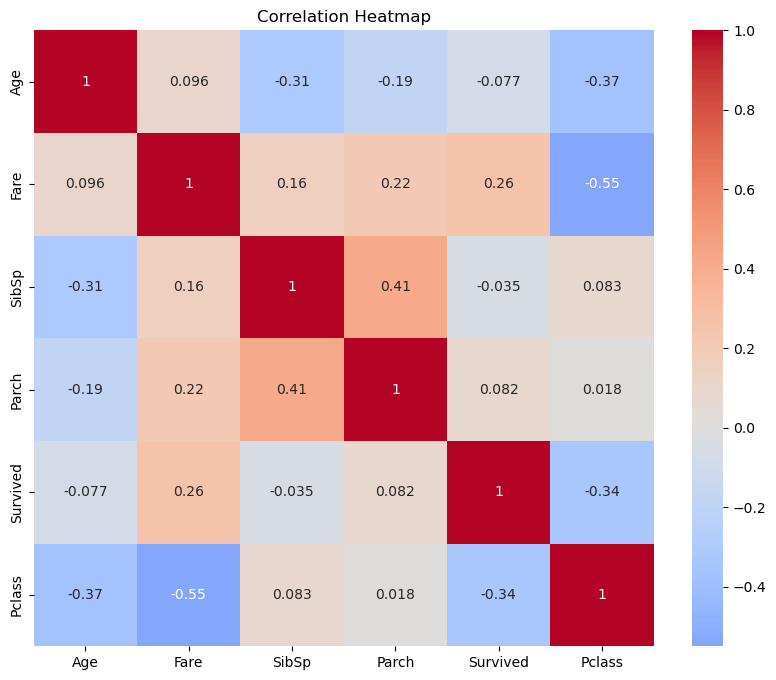

In [14]:
corr_matrix = titanic[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

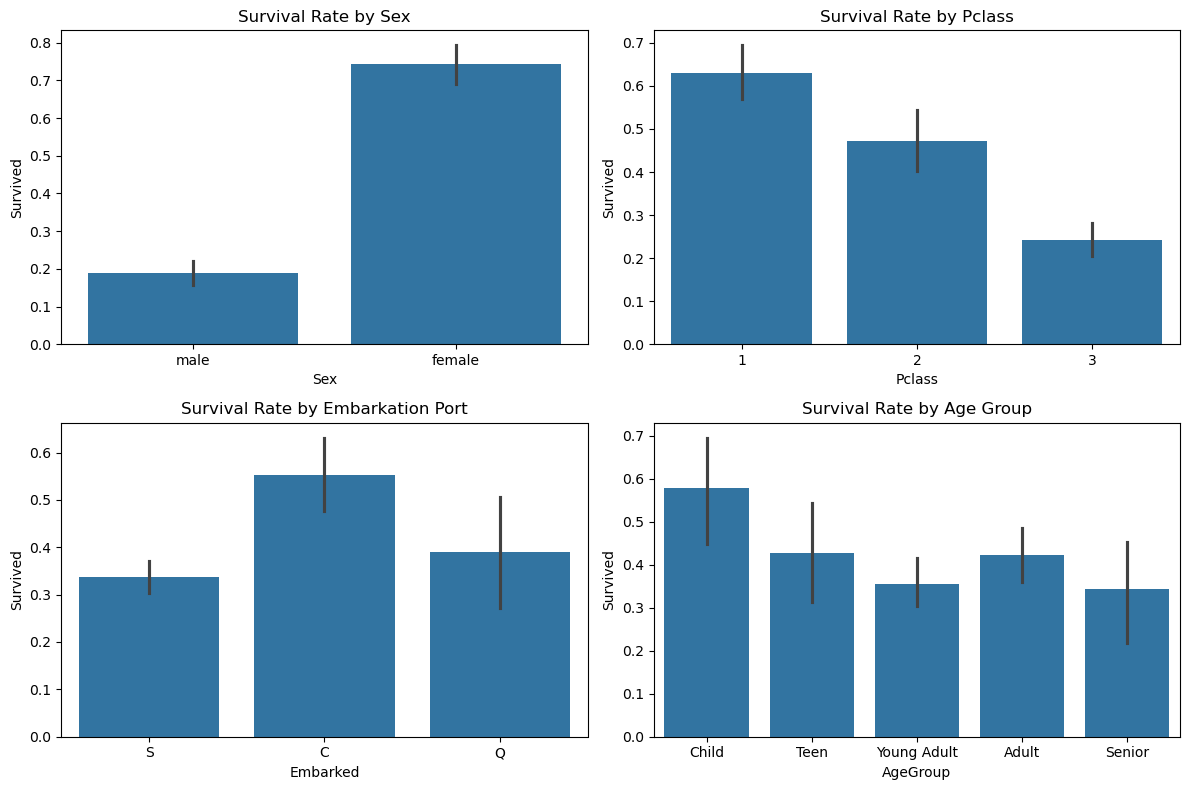

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')

plt.subplot(2, 2, 2)
sns.barplot(data=titanic, x='Pclass', y='Survived')
plt.title('Survival Rate by Pclass')

plt.subplot(2, 2, 3)
sns.barplot(data=titanic, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarkation Port')

age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)
plt.subplot(2, 2, 4)
sns.barplot(data=titanic, x='AgeGroup', y='Survived', order=age_labels)
plt.title('Survival Rate by Age Group')
plt.tight_layout()
plt.show()

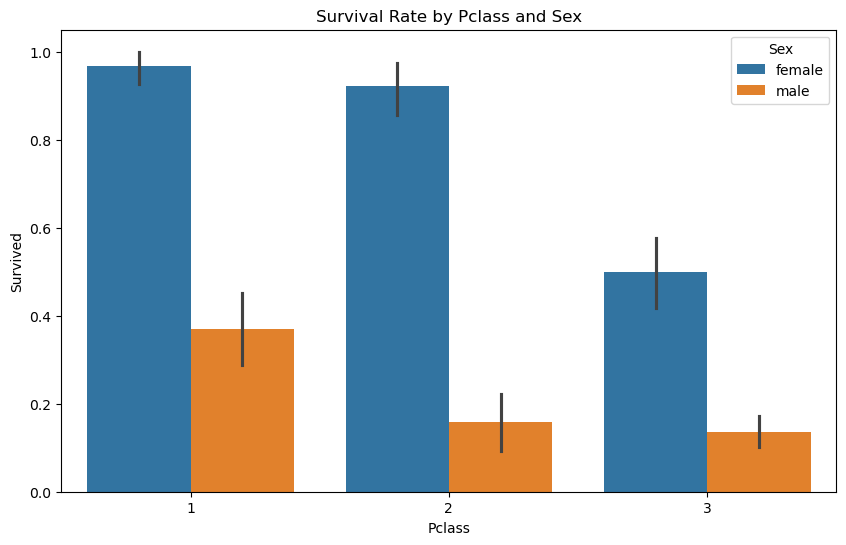

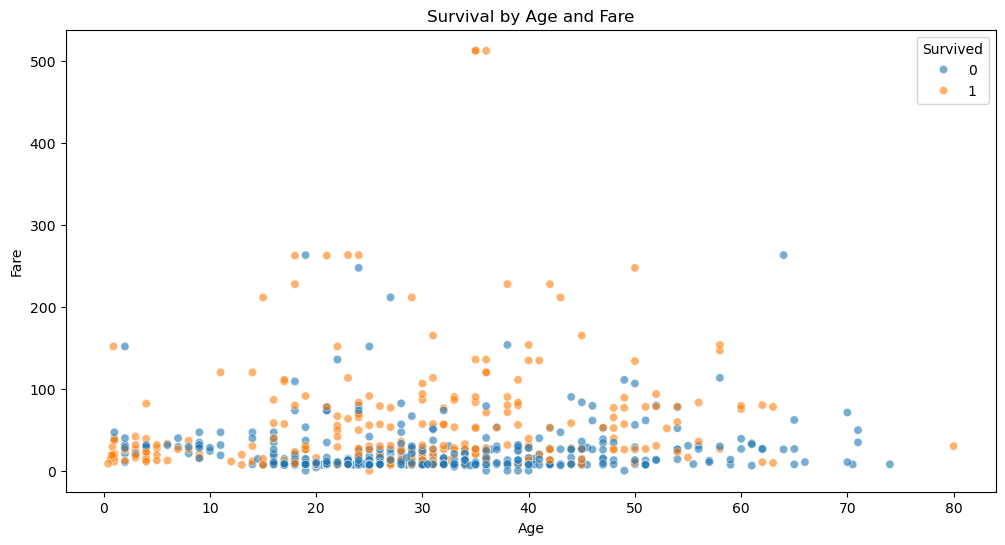

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Pclass and Sex')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived', alpha=0.6)
plt.title('Survival by Age and Fare')
plt.show()

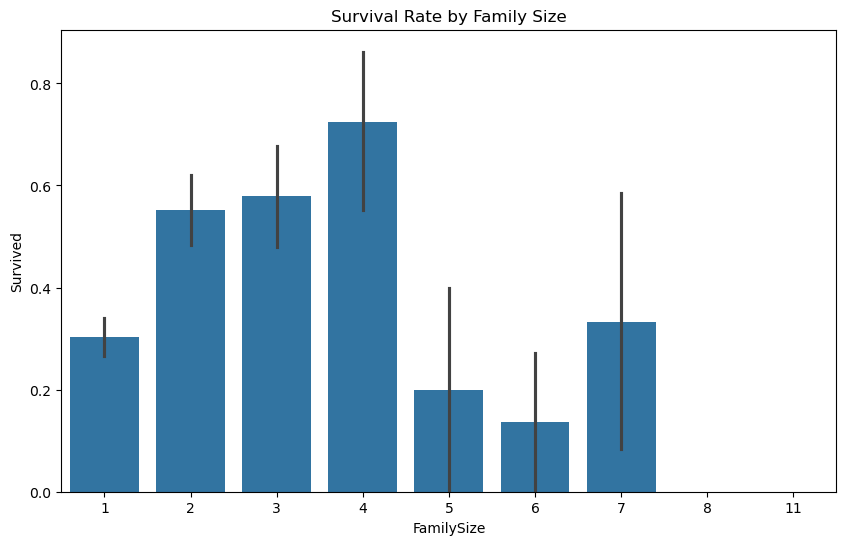

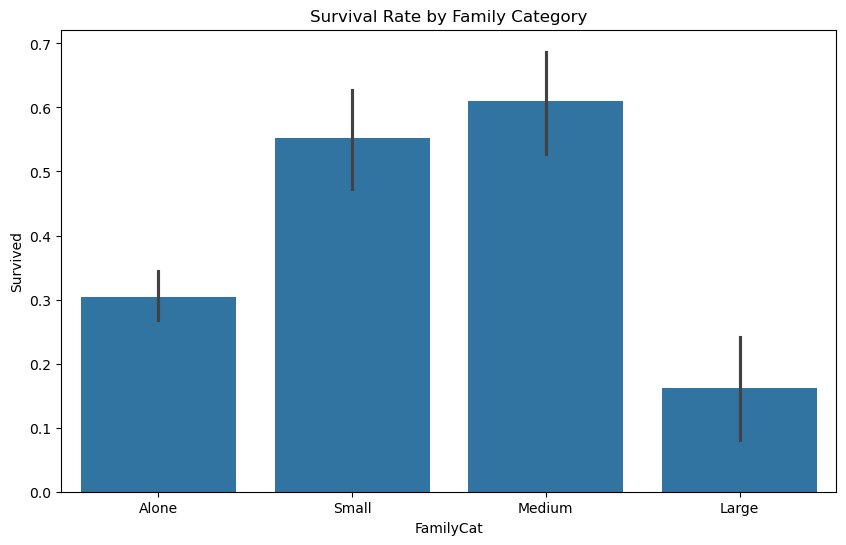

In [20]:
# Create family size feature
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Analyze survival by family size
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.show()

# Create categories for family size
titanic['FamilyCat'] = 'Alone'
titanic.loc[titanic['FamilySize'] == 2, 'FamilyCat'] = 'Small'
titanic.loc[titanic['FamilySize'].between(3, 4), 'FamilyCat'] = 'Medium'
titanic.loc[titanic['FamilySize'] >= 5, 'FamilyCat'] = 'Large'

plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='FamilyCat', y='Survived', order=['Alone', 'Small', 'Medium', 'Large'])
plt.title('Survival Rate by Family Category')
plt.show()

Title Counts:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/5d/72n_0nvd5k54vykxz8qx9p7h0000gn/T/ipykernel_91187/768668493.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


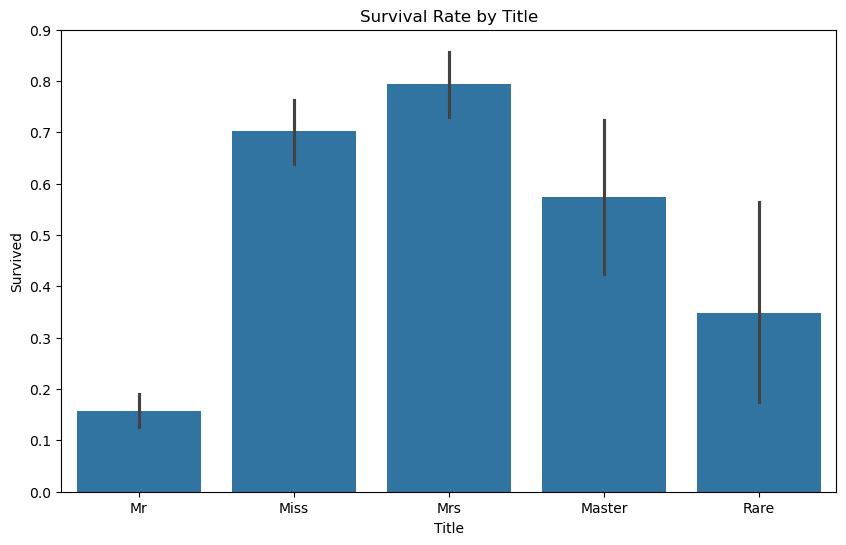

In [22]:
# Extract titles from names
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Analyze titles
title_counts = titanic['Title'].value_counts()
print("Title Counts:")
print(title_counts)

# Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic['Title'] = titanic['Title'].replace(rare_titles, 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

# Survival by title
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='Title', y='Survived', order=['Mr', 'Miss', 'Mrs', 'Master', 'Rare'])
plt.title('Survival Rate by Title')
plt.show()